# Interfacing with the LLC SST data

## Install these packages:

### https://remote-sensing.readthedocs.io/en/latest/

### https://wrangler.readthedocs.io/en/latest/

In [28]:
# imports
from importlib import reload

import numpy as np
import pandas
import os

import h5py

from remote_sensing.plotting import globe

from wrangler.tables import io as wr_tab_io
from wrangler.plotting import cutout as plot_cutout

# Grab the files

## Parquet Table (69Mb)

In [2]:
### wget https://s3-west.nrp-nautilus.io/llc/Tables/LLC_uniform144_r0.5_nonoise.parquet

## Data file (44Gb)

In [19]:
### wget https://s3-west.nrp-nautilus.io/llc/PreProc/LLC_uniform144_nonoise_preproc.h5

# Inspect a bit

## Table

In [4]:
tbl_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Tables', 'LLC_uniform144_r0.5_nonoise.parquet')
llc_tbl = wr_tab_io.load_main_table(tbl_file)

Read main table: /home/xavier/Oceanography/data/OGCM/LLC/Tables/LLC_uniform144_r0.5_nonoise.parquet


In [24]:
len(llc_tbl)

2783160

In [26]:
np.sum(np.isfinite(llc_tbl.mean_temperature))

np.int64(2623152)

In [5]:
llc_tbl.head()

,lat,lon,row,col,datetime,filename,pp_file,pp_root,field_size,pp_idx,pp_type,mean_temperature,Tmin,Tmax,T90,T10,LL,DT
0,56.752953,-170.447922,11465,10890,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,56.796970,-155.677078,11469,11599,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56.818966,-155.635422,11471,11601,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56.631676,-152.864578,11454,11734,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,56.917801,-152.114578,11480,11770,2011-09-18,/data/Projects/Oceanography/data/LLC/ThetaUVSa...,s3://llc/PreProc/LLC_uniform144_nonoise_prepro...,llc_144_nonoise,64,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## The columns are defined here:

### https://github.com/Sea-Meets-the-Stars/wrangler/blob/main/wrangler/defs.py

### Except mean_temperature, which you can infer. :) 

## Here is a quick plot of the spatial distribution

In [10]:
hasattr(llc_tbl.mean_temperature, 'mask')

True

In [13]:
llc_tbl.mean_temperature.values

array([       nan,        nan,        nan, ..., 5.82528925, 6.07225561,
       6.40820789], shape=(2783160,))

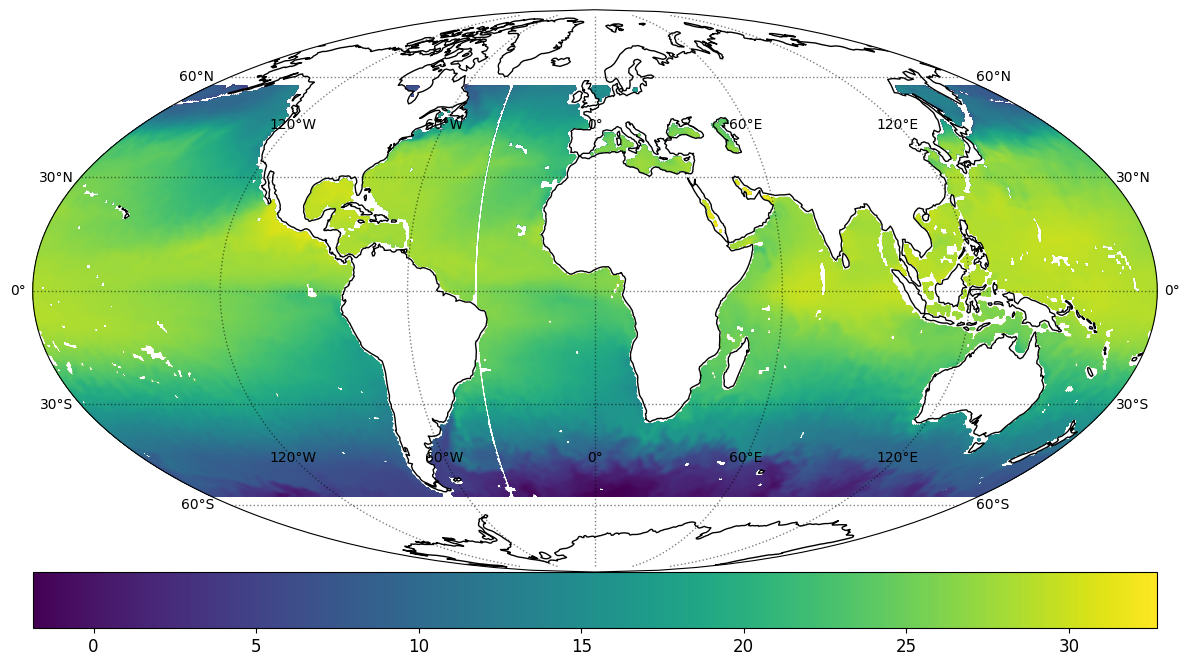

In [18]:
reload(globe)
_  = globe.plot_lons_lats_vals(llc_tbl.lon.values, llc_tbl.lat.values, llc_tbl.mean_temperature.values,
                         show=True)

# Now the cutouts, each of which is 64x64 pixels covering 144x144 km^2

In [21]:
tbl_file = os.path.join(os.getenv('OS_OGCM'), 'LLC', 'Nenya', 
                        'PreProc', 'LLC_uniform144_nonoise_preproc.h5')
f = h5py.File(tbl_file,'r')

In [23]:
f['valid'].shape

(2623152, 1, 64, 64)

In [27]:
cutout = f['valid'][100,0,...]

<Axes: >

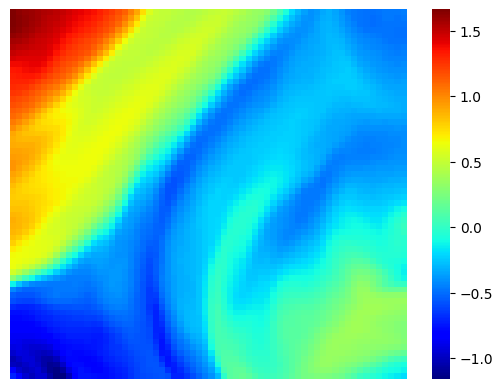

In [29]:
plot_cutout.show_image(cutout)